In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [2]:
rating = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')
anime


FileNotFoundError: [Errno 2] No such file or directory: 'rating.csv'

In [ ]:
# PART 1. DATA PREPROCESSING

#First, Merging the user rating dataframe with anime dataframe in order to get anime name

In [ ]:
rating = pd.merge(rating,anime.drop('rating',axis=1),on='anime_id')
rating.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


In [ ]:
# Checking Anime name by rating

In [ ]:
rating.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)


name
Choegang Top Plate                                                  10.000000
STAR BEAT!: Hoshi no Kodou                                          10.000000
Shiroi Zou                                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Tang Lang Bu Chan                                                    9.000000
Shiranpuri                                                           9.000000
Doukyuusei                                                           9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.297863
Name: rating, dtype: float64

In [ ]:
# Here, animes with 10 rating only got a few users watched them so the rating goes up so high.
# So, we will make another attribute in order to get better recommendation. 
# Number of users seems logical since the more users watched the anime, higher probability the anime gets the actual rating based on many users.

In [ ]:
rating.groupby('name')['rating'].count().sort_values(ascending=False).head(10)


name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

In [ ]:
# Now we see some popular anime here like Shingeki No Kyojin, Naruto, and even Fullmetal Alchemist.

In [ ]:
# PART 2. EXPLORATORY DATA ANALYSIS

In [ ]:
ratings = pd.DataFrame(rating.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(rating.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


In [ ]:
# Checking anime number of rating distribution 

Text(0, 0.5, 'No. of viewers')

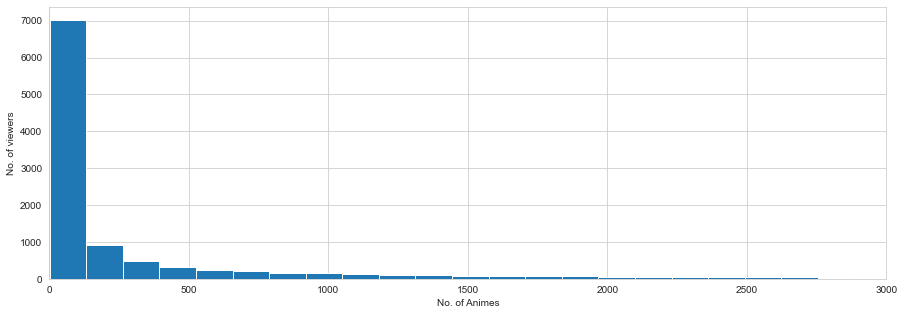

In [ ]:
plt.figure(figsize=(15,5))
ratings['num of ratings'].hist(bins=300)
plt.xlim(0,3000)
plt.xlabel('No. of Animes')
plt.ylabel('No. of viewers')

Text(0, 0.5, 'No. of animes')

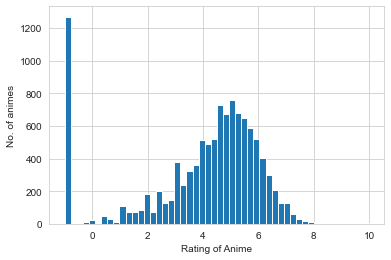

In [ ]:
ratings['rating'].hist(bins=50)
plt.xlabel('Rating of Anime')
plt.ylabel('No. of animes')


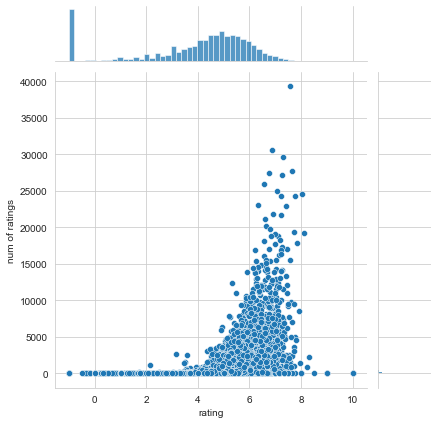

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)

In [ ]:
# From above scatterplot, we can see the higher number of users give rating, higher chance of the anime gets high rating too.

In [ ]:
# PART 3. FUNCTION CREATION

# Now we wll create the function to be executed when a user accessing an anime page, so that user can get the recommendation based on that anime.
# This recommendation will be generated based on ratings and genre.

In [ ]:
def check_genre(genre_list, string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False


def get_recommendation(name):
    #generating list of anime with the same genre with target
    anime_genre = genre_dict.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(
        lambda x: check_genre(anime_genre, str(x)))]['name'].tolist()

    #create matrix based on generated list
    animemat = rating[rating['name'].isin(cols)].pivot_table(
        index='user_id', columns='name', values='rating')

    #create correlation table
    anime_user_rating = animemat[name]
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime, columns=['correlation'])
    corr_anime = corr_anime.join(ratings['num of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['num of ratings'] > 5000].sort_values(
        'correlation', ascending=False)

    return corr_anime.head(10)


In [ ]:
# PART 4. TESTING

In [ ]:
get_recommendation('Shingeki no Kyojin')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Shingeki no Kyojin,1.000000,29584
Suisei no Gargantia,0.752774,6371
Kami nomi zo Shiru Sekai: Megami-hen,0.750020,5733
Blood Lad,0.741779,8507
Hitsugi no Chaika,0.736769,5168
Maoyuu Maou Yuusha,0.732879,5693
Danganronpa: Kibou no Gakuen to Zetsubou no Koukousei The Animation,0.728270,10082
Magi: The Labyrinth of Magic,0.726442,9907
Psycho-Pass,0.726120,14008


In [ ]:
get_recommendation('Kimi no Na wa.')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Beelzebub,0.710506,5871
Amagami SS,0.705351,5497
Bakuman. 2nd Season,0.677092,6164
Re:Zero kara Hajimeru Isekai Seikatsu,0.671666,6123
Boku no Hero Academia,0.669247,6034
Shigatsu wa Kimi no Uso,0.667975,9448
Dance in the Vampire Bund,0.667899,5174
Princess Lover!,0.665735,5005
Eureka Seven,0.665077,7851


In [ ]:
get_recommendation('Naruto')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Naruto,1.000000,25925
Bleach,0.720531,12845
InuYasha,0.704638,9328
Shaman King,0.696407,7814
Katekyo Hitman Reborn!,0.694202,6739
Tenjou Tenge,0.691476,5150
Sekirei,0.691413,7924
Rurouni Kenshin: Meiji Kenkaku Romantan,0.690855,7900
Shijou Saikyou no Deshi Kenichi,0.690250,5654


In [ ]:
get_recommendation('Mushishi')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Mushishi,1.000000,7004
D-Frag!,0.728374,5124
Samurai Champloo,0.720465,14068
Natsume Yuujinchou,0.720205,6052
Hitsugi no Chaika,0.711976,5168
Arakawa Under the Bridge,0.710618,5732
Ghost in the Shell: Stand Alone Complex,0.706540,6329
Kami nomi zo Shiru Sekai: Megami-hen,0.706520,5733
Kami nomi zo Shiru Sekai II,0.705563,9235


In [ ]:
get_recommendation('Noragami')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Noragami,1.000000,15070
Hitsugi no Chaika,0.798425,5168
Kami nomi zo Shiru Sekai: Megami-hen,0.792456,5733
Kyoukai no Kanata,0.791119,11152
Suisei no Gargantia,0.789261,6371
Nisekoi,0.784901,10337
Magi: The Kingdom of Magic,0.783770,7279
Strike the Blood,0.776561,6434
Monogatari Series: Second Season,0.776080,6058


In [ ]:
dup_rating = rating[rating.duplicated()].shape[0]
print(
    f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first', inplace=True)
print(
    f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")


There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


In [ ]:
%pip install Jinja2

  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in spli

In [3]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

NameError: name 'anime' is not defined

In [ ]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Merged Dataset : (7813726, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


In [ ]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Merged Dataset : (7813726, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


In [ ]:
sns.set_style("white")
sns.set_context("poster", font_scale=.7)

palette = ["#1d7874", "#679289", "#f4c095", "#ee2e31", "#ffb563", "#918450", "#f85e00",
           "#a41623", "#9a031e", "#d6d6d6", "#ffee32", "#ffd100", "#333533", "#202020"]

# sns.palplot(sns.color_palette(palette))
# plt.show()


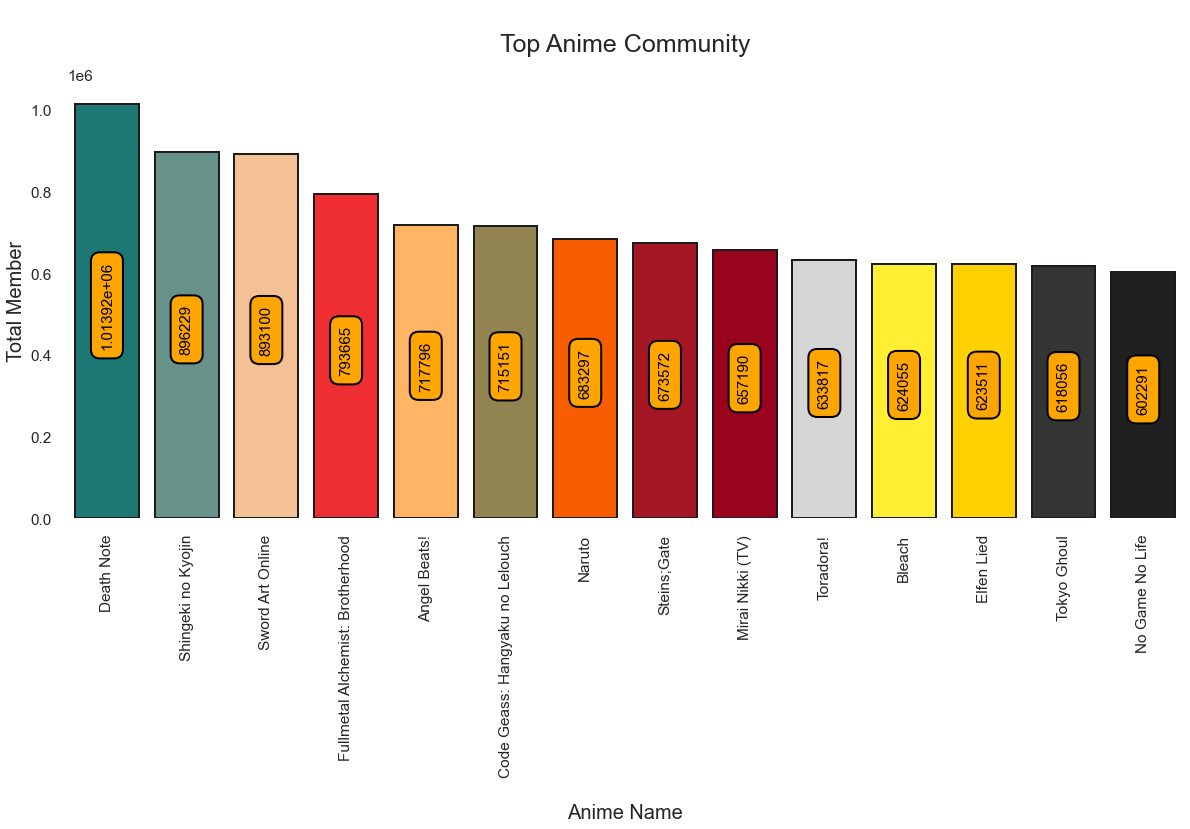

In [ ]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset="name", keep="first", inplace=True)
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False)

plt.subplots(figsize=(20, 8))
p = sns.barplot(x=top_anime_temp1["name"][:14], y=top_anime_temp1["members"],
                palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member", fontsize=20)
plt.xlabel("\nAnime Name", fontsize=20)
# plt.yscale("log")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=6, size=15, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()
